# Nearest Neighbor Classifier

In [2]:
import numpy as np
import time
from data_utils import load_CIFAR10
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

cifar10_dir = 'cifar-10-batches-py'
X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)
print 'Training data shape: ', X_train.shape
print 'Training labels shape: ', y_train.shape
print 'Test data shape: ', X_test.shape
print 'Test labels shape: ', y_test.shape

# Subsample the data for more efficient code execution in this exercise
num_training = 50000
mask = range(num_training)
X_train = X_train[mask]
y_train = y_train[mask]

num_test = 100
mask = range(num_test)
X_test = X_test[mask]
y_test = y_test[mask]
print 'Test data shape: ', X_test.shape

# Reshape the image data into rows
print (X_train.shape[0], -1)
X_train = np.reshape(X_train, (X_train.shape[0], -1))
X_test = np.reshape(X_test, (X_test.shape[0], -1))
print X_train.shape, X_test.shape

from nearest_neighbor import NearestNeighbor
print X_train - X_test[0, :]
print X_test[0, :]
nn = NearestNeighbor()
nn.train(X_train, y_train)
# start_time = time.time()
# Y_pred_euclidean = nn.predict_euclidean(X_test)
# elapsed_seconds = time.time() - start_time
# print "Elapsed seconds: ", elapsed_seconds
# start_time = time.time()
# Y_pred_manhattan = nn.predict_manhattan(X_test)
# elapsed_seconds = time.time() - start_time
# print "Elapsed seconds: ", elapsed_seconds
# print 'done'

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Training data shape:  (50000, 32, 32, 3)
Training labels shape:  (50000,)
Test data shape:  (10000, 32, 32, 3)
Test labels shape:  (10000,)
Test data shape:  (100, 32, 32, 3)
(50000, -1)
(50000, 3072) (100, 3072)
[[ -99.  -50.   14. ...,  102.   25.  -38.]
 [  -4.   65.  138. ...,  122.   66.   34.]
 [  97.  143.  206. ...,   59.   19.  -26.]
 ..., 
 [-123.   66.  186. ...,   -9.  -36.  -60.]
 [  31.   99.  191. ...,  174.  123.   61.]
 [  71.  117.  190. ...,  142.   96.   51.]]
[ 158.  112.   49. ...,   21.   67.  110.]


In [1]:
print len(np.nonzero(Y_pred_manhattan == y_test)[0])*1.0/len(Y_pred)
print len(np.nonzero(Y_pred_euclidean == y_test)[0])*1.0/len(Y_pred)

NameError: name 'np' is not defined

In [7]:
dists = np.zeros((2, 5))
print dists[0,0]
#from knn import KNearestNeighbor


0.0


In [9]:
import scipy
import pylab
import scipy.cluster.hierarchy as sch

# Generate random features and distance matrix.
x = scipy.rand(40)
D = scipy.zeros([40,40])
for i in range(40):
    for j in range(40):
        D[i,j] = abs(x[i] - x[j])

# Compute and plot first dendrogram.
fig = pylab.figure(figsize=(8,8))
ax1 = fig.add_axes([0.09,0.1,0.2,0.6])
Y = sch.linkage(D, method='centroid')
Z1 = sch.dendrogram(Y, orientation='right')
ax1.set_xticks([])
ax1.set_yticks([])

# Compute and plot second dendrogram.
ax2 = fig.add_axes([0.3,0.71,0.6,0.2])
Y = sch.linkage(D, method='single')
Z2 = sch.dendrogram(Y)
ax2.set_xticks([])
ax2.set_yticks([])

# Plot distance matrix.
axmatrix = fig.add_axes([0.3,0.1,0.6,0.6])
idx1 = Z1['leaves']
idx2 = Z2['leaves']
D = D[idx1,:]
D = D[:,idx2]
im = axmatrix.matshow(D, aspect='auto', origin='lower', cmap=pylab.cm.YlGnBu)
axmatrix.set_xticks([])
axmatrix.set_yticks([])

# Plot colorbar.
axcolor = fig.add_axes([0.91,0.1,0.02,0.6])
pylab.colorbar(im, cax=axcolor)
fig.show()
fig.savefig('dendrogram.png')

0.00669285092428
0.73105857863
0.999954602131


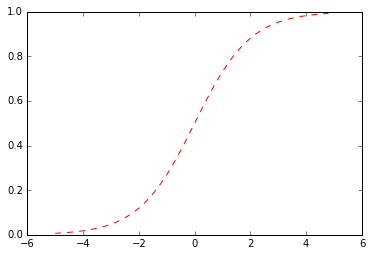

In [12]:
%matplotlib inline
t = np.arange(-5, 5, 0.2)

def sigmoid(t):
    return 1/(1 + np.exp(-t))

print sigmoid(-5)
print sigmoid(1)
print sigmoid(10)
plt.plot(t, 1/(1 + np.exp(-t)), 'r--')
plt.show()